###Necessary basic libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Uploading and Reading the data

In [ ]:
data = pd.read_csv('/content/mcdonalds.csv')

###Exploring Data

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
data.shape

(1453, 15)

In [ ]:
data['Gender'].value_counts('Female')

Female    0.542326
Male      0.457674
Name: Gender, dtype: float64

In [ ]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [ ]:
# Assuming 'data' is a pandas DataFrame
MD_x = data.iloc[:, 0:11].values
MD_x = np.where(MD_x == "Yes", 1, 0)

column_means = np.mean(MD_x, axis=0)
rounded_means = np.round(column_means, 2)

# Retrieve column names from the original DataFrame
column_names = data.columns[:11]  # Select first 11 column names
# Create a pandas Series to align values with names
results = pd.Series(rounded_means, index=column_names)
print(results)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary of PCA results
print(pca.explained_variance_ratio_)  # Explained variance ratios
print(pca.singular_values_)  # Singular values


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


In [ ]:
# Print explained variance ratios rounded to 1 decimal place
print(np.round(pca.explained_variance_ratio_, 1))

# Print singular values rounded to 1 decimal place
print(np.round(pca.singular_values_, 1))

[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


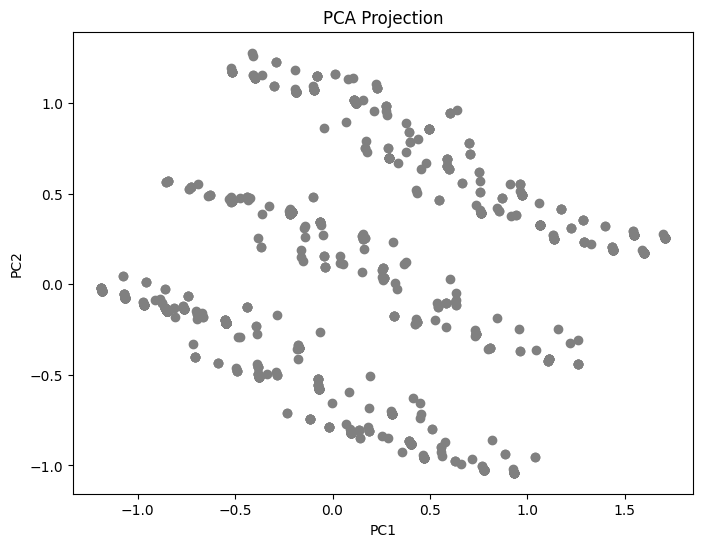

[[-0.47693349  0.36378978 -0.30444402  0.0551622  -0.30753507  0.17073819
  -0.28051863  0.01304117  0.57240278 -0.11028437  0.04543901]
 [-0.15533159  0.016414   -0.0625153  -0.14242496  0.27760805 -0.34783006
  -0.05973793 -0.11307868 -0.01846534 -0.66581756 -0.54161635]
 [-0.00635636  0.01880869 -0.03701866  0.19761927  0.07062017 -0.3550866
   0.70763705  0.37593402  0.40027977 -0.07563413  0.14172992]
 [ 0.11623168 -0.03409395 -0.32235949 -0.35413876 -0.07340475 -0.40651542
  -0.38594277  0.58962241 -0.16051227 -0.00533813  0.25090987]
 [ 0.3044427  -0.06383884 -0.80237317  0.2539601   0.36139895  0.20934711
   0.03616962 -0.13824084 -0.00284738  0.00870725  0.00164229]
 [-0.10849325 -0.0869722  -0.06464172 -0.09736269  0.10793025 -0.59463206
  -0.08684577 -0.62779877  0.16619659  0.23953197  0.33926454]
 [-0.33718593 -0.61063276 -0.14931026  0.11895823 -0.12897259 -0.10324067
  -0.04044934  0.14006047  0.07606907  0.42808739 -0.48928285]
 [-0.47151394  0.3073178  -0.28726479 -0.0

In [ ]:
# Create PCA plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color="grey")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

# Access projection information
projection_axes = pca.components_.T  # Transpose of components matrix
print(projection_axes)

###**Customer segmentation baed on socio-demographics**

(-1.25, 1.25, -1.25, 1.25)

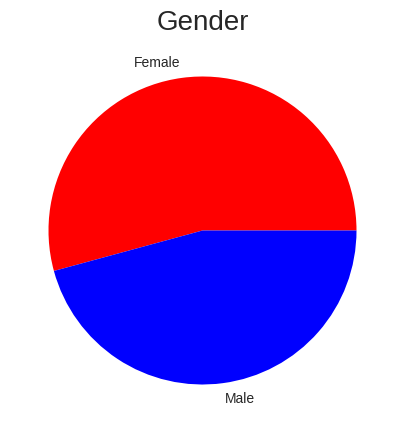

In [ ]:
#Based on Gender
Labels = ['Female','Male']
size = data['Gender'].value_counts()
colors = ['red','blue']
plt.figure(figsize=(5,5))
plt.pie(size, labels=Labels, colors=colors)
plt.title('Gender', fontsize = 20)
plt.axis('off')

<function matplotlib.pyplot.show(close=None, block=None)>

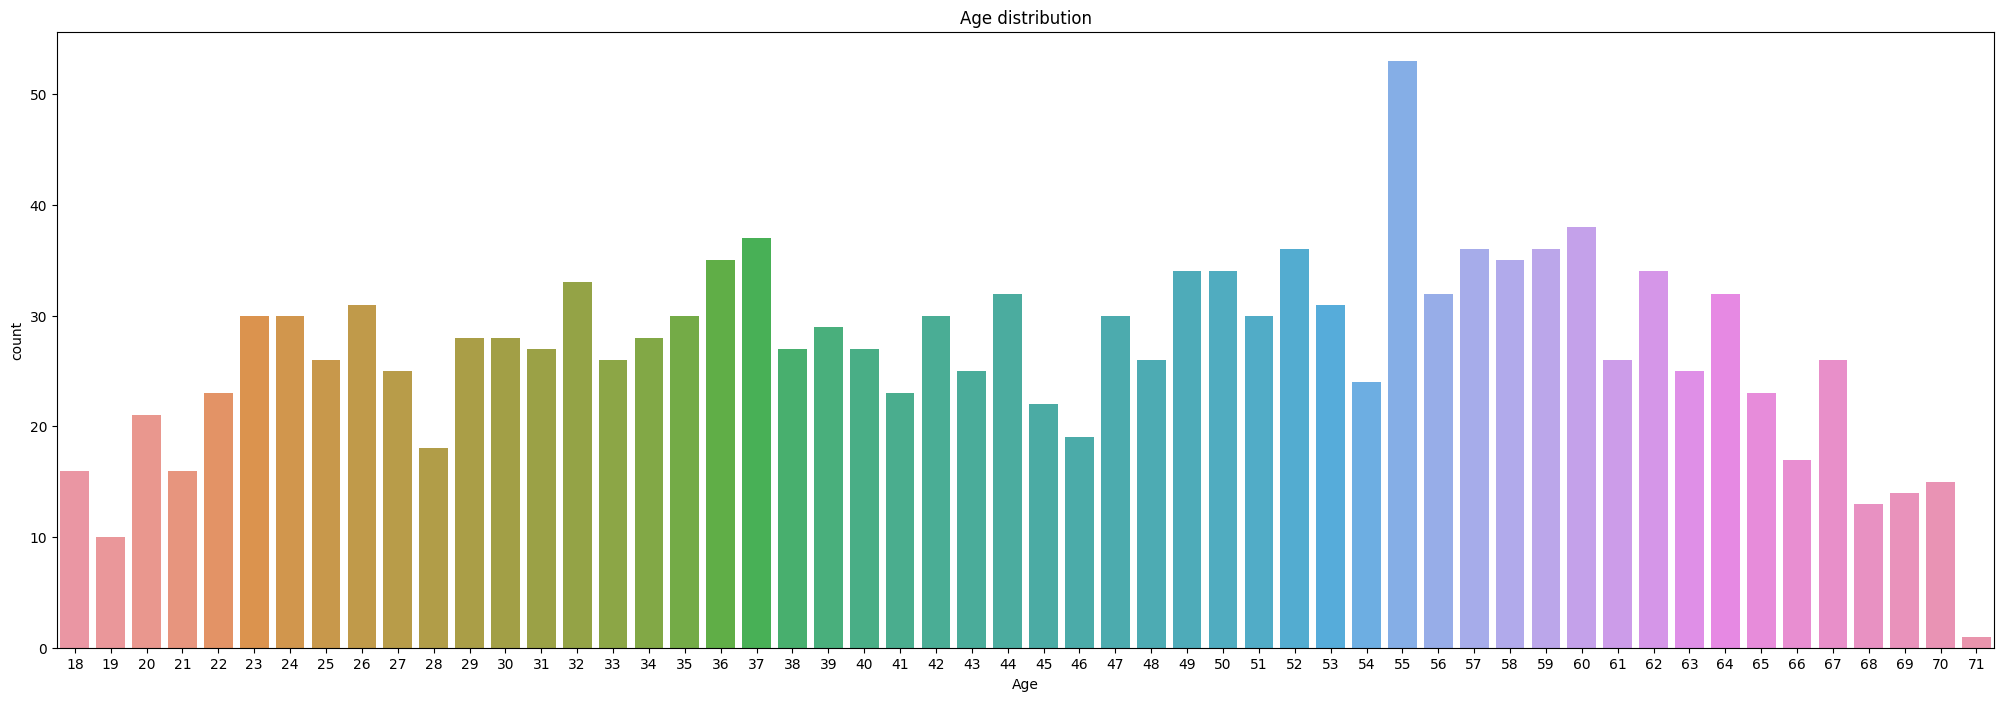

In [ ]:
plt.figure(figsize=(25,8))
sns.countplot(x=data['Age'])
plt.title('Age distribution')
plt.show

##Extracting Segments

In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
df_eleven = data.loc[:,cat]
df_eleven
for i in cat:
    labelling(i)
data
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


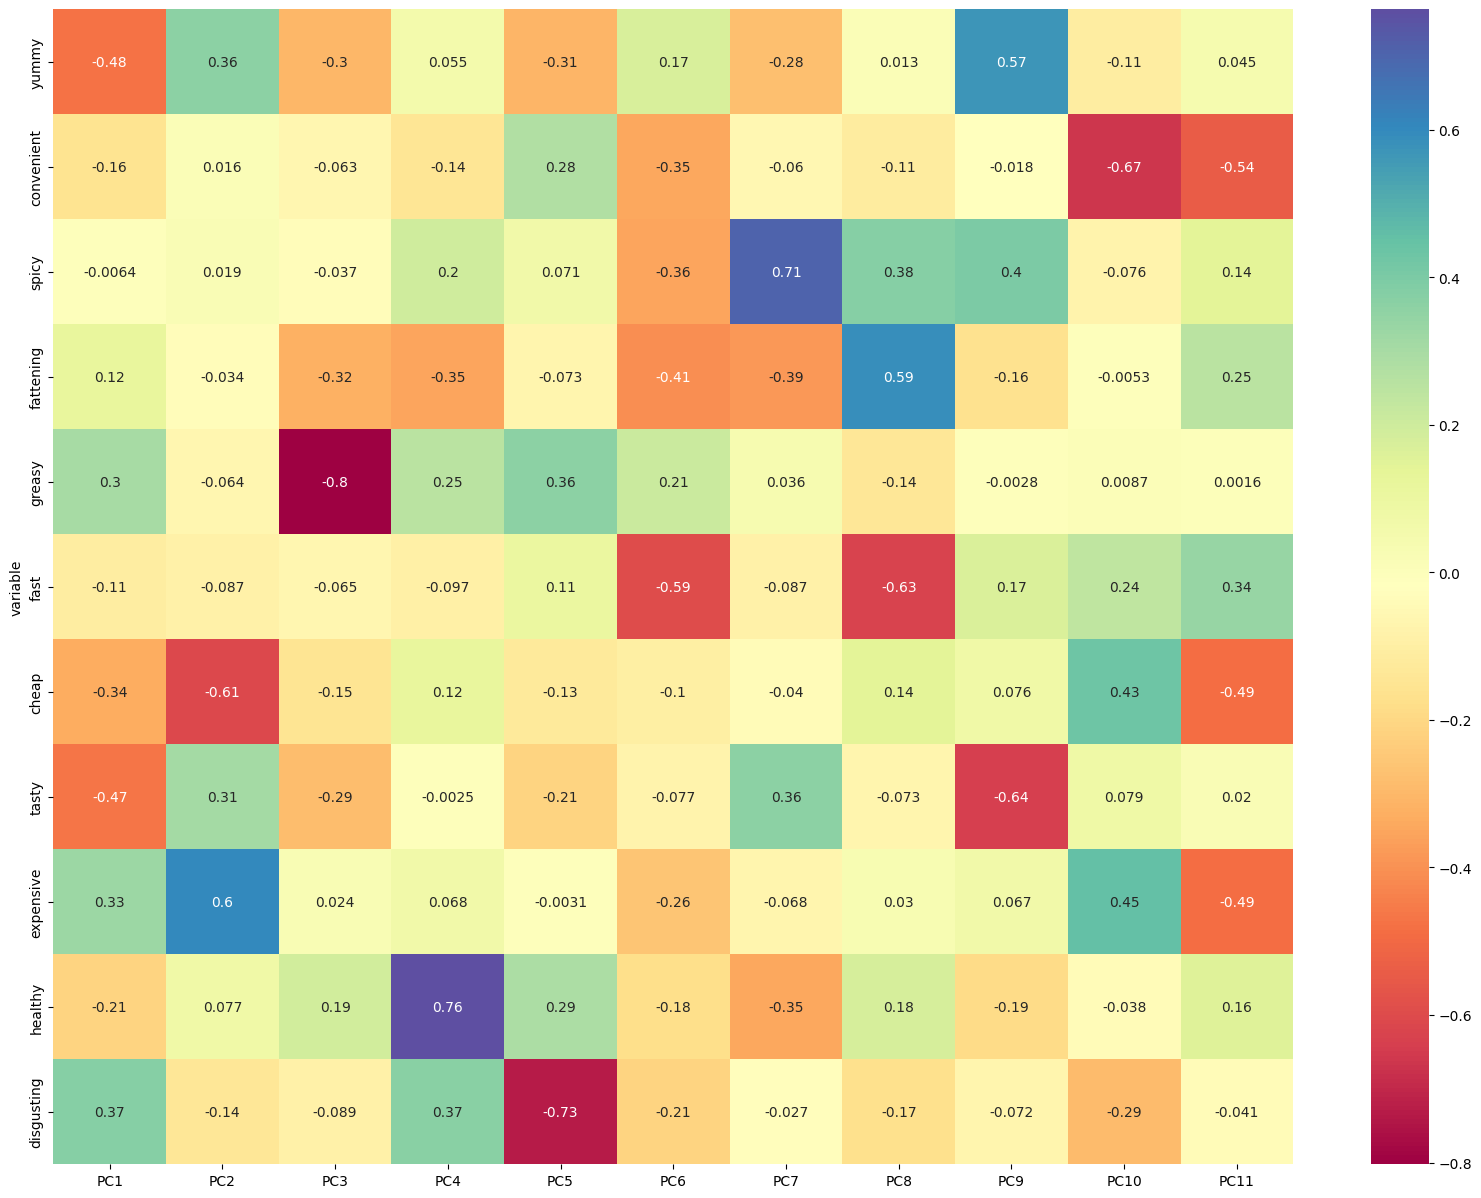

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
!pip install bioinfokit

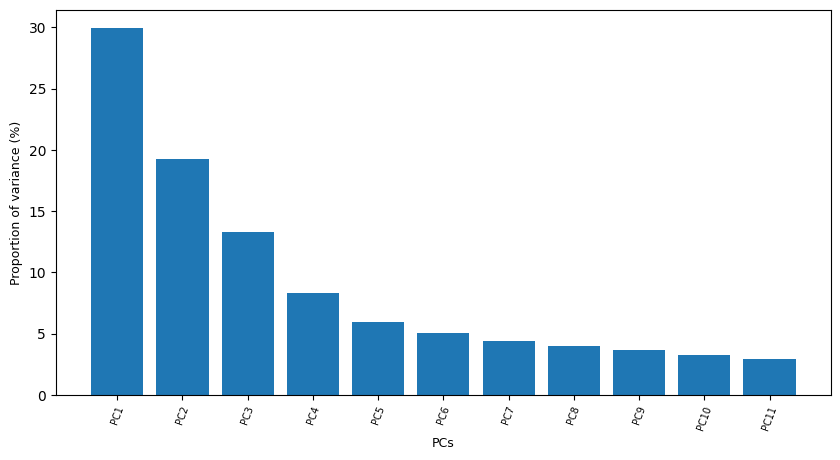

In [ ]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

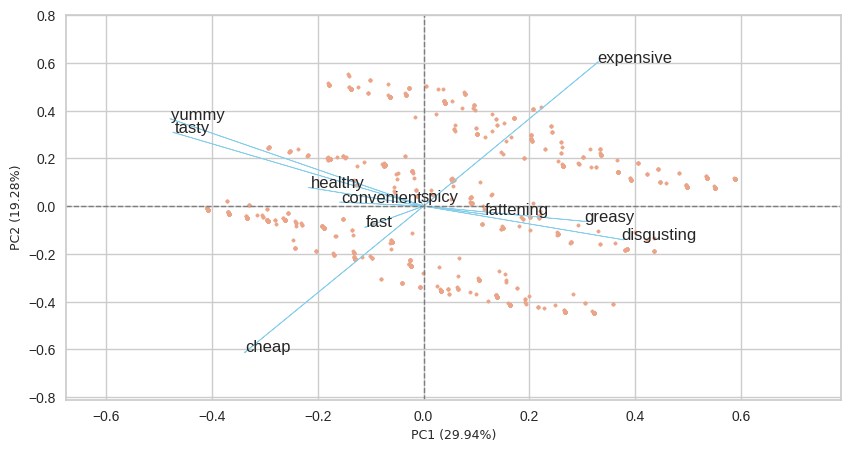

In [ ]:
# get PC scores

x = data.loc[:,cat].values
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

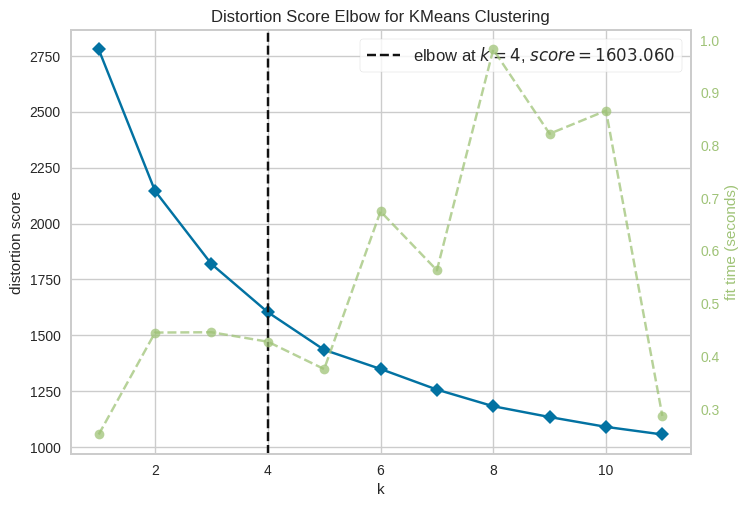

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [ ]:
#K-means clustering

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
data['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

[2 0 0 ... 0 1 3]
1603.0604440558923
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


Counter({2: 304, 0: 323, 1: 580, 3: 246})

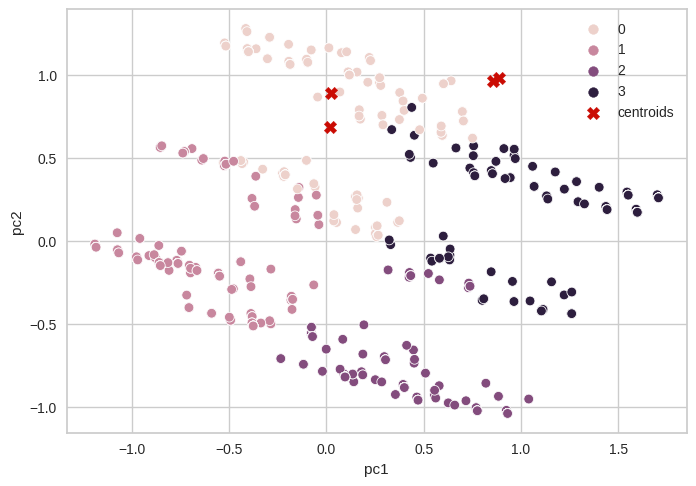

In [ ]:
#Visulazing clusters
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = MD_pca, columns = names)
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(data['cluster_num'],data['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


<Axes: xlabel='cluster_num', ylabel='Age'>

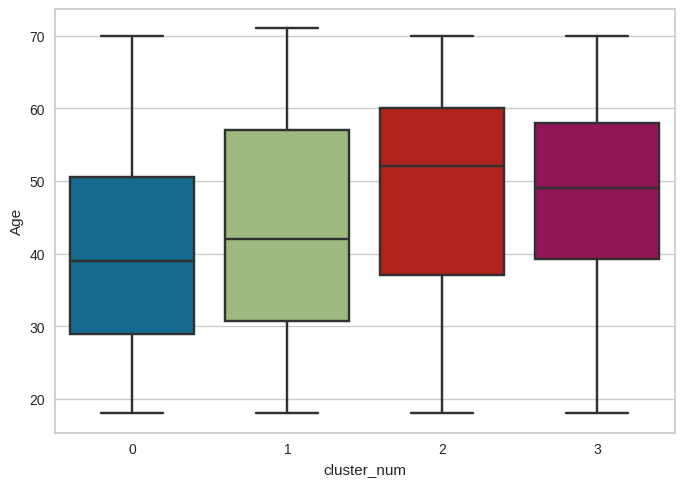

In [ ]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data= data)

In [ ]:
#Calculating the mean
#Visit frequency
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [ ]:
#Gender
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [ ]:
#Like
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [ ]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


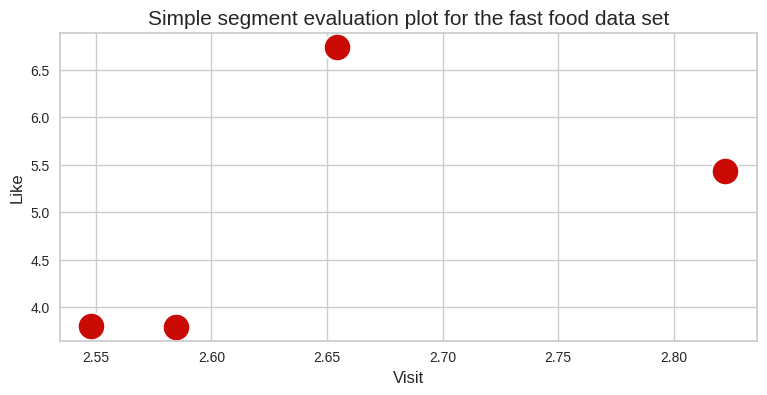

In [ ]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()